#  World Happiness Report 2024 — Exploratory Data Analysis  


###  Submitted by: Kavya Mehta  
###  GIRD No: 11717



This project explores the **World Happiness Report 2024**, analyzing global happiness scores and the factors that influence them. We focus especially on **India's position**, comparing it with top-performing countries, least happy nations, and regional neighbors.

###  Objectives:
- Understand global happiness distribution
- Compare India with top and bottom countries
- Analyze key factors like GDP, health, freedom, and corruption
- Visualize India's strengths and weaknesses
- Reveal regional and global patterns

The dataset includes 143 countries and several contributing metrics. Let's dive in!

#1: Load and Preview Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from IPython.display import display




In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from IPython.display import display

# Upload and read file
df = pd.read_csv(list(files.upload().keys())[0])

# Basic info
print("--- Dataset Overview ---")
print(f"Total countries: {df.shape[0]}")
print(f"Columns: {list(df.columns)}")

# Preview + India
preview = df[['Country name', 'Ladder score', 'Log GDP per capita', 'Healthy life expectancy']].head(10)
india = df[df['Country name'] == 'India'][['Country name', 'Ladder score', 'Log GDP per capita', 'Healthy life expectancy']]
combined = pd.concat([preview, india]).drop_duplicates()

# Styled display
display(
    combined.style
    .set_caption("Sample of Dataset + India’s Entry")
    .highlight_max(color='lightgreen')
    .highlight_min(color='lightcoral')
    .set_properties(**{'text-align': 'center'})
)

Saving World-happiness-report-2024.csv to World-happiness-report-2024.csv
--- Dataset Overview ---
Total countries: 143
Columns: ['Country name', 'Regional indicator', 'Ladder score', 'upperwhisker', 'lowerwhisker', 'Log GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Dystopia + residual']


,Country name,Ladder score,Log GDP per capita,Healthy life expectancy
0,Finland,7.741000,1.844000,0.695000
1,Denmark,7.583000,1.908000,0.699000
2,Iceland,7.525000,1.881000,0.718000
3,Sweden,7.344000,1.878000,0.724000
4,Israel,7.341000,1.803000,0.740000
5,Netherlands,7.319000,1.901000,0.706000
6,Norway,7.302000,1.952000,0.704000
7,Luxembourg,7.122000,2.141000,0.708000
8,Switzerland,7.060000,1.970000,0.747000
9,Australia,7.057000,1.854000,0.692000


### 🟩🟥 Color Highlights in the Table

In the table above, I’ve used colors to make things easier to understand:

- 🟩 **Green** shows the **highest value** in each column — basically the best performer for that factor.
- 🟥 **Red** shows the **lowest value** — the weakest performer for that factor.

This helps quickly spot which countries are doing really well or not so great in each area. It also makes it easier to see where India stands compared to others.

#2: India vs. Top & Bottom Countries

In this section, I’ve compared India with the **top 10 happiest countries** and the **bottom 10 least happy ones** from the dataset. This gives a clear idea of where India stands globally — whether it's closer to the top or bottom of the happiness scale.

To make it easy to spot, I’ve highlighted **India in red** on both charts. This way, you can quickly see how far India is from the happiest countries and how it compares to the least happy ones.

/tmp/ipython-input-1996703026.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country name', y='Ladder score', data=custom_top,


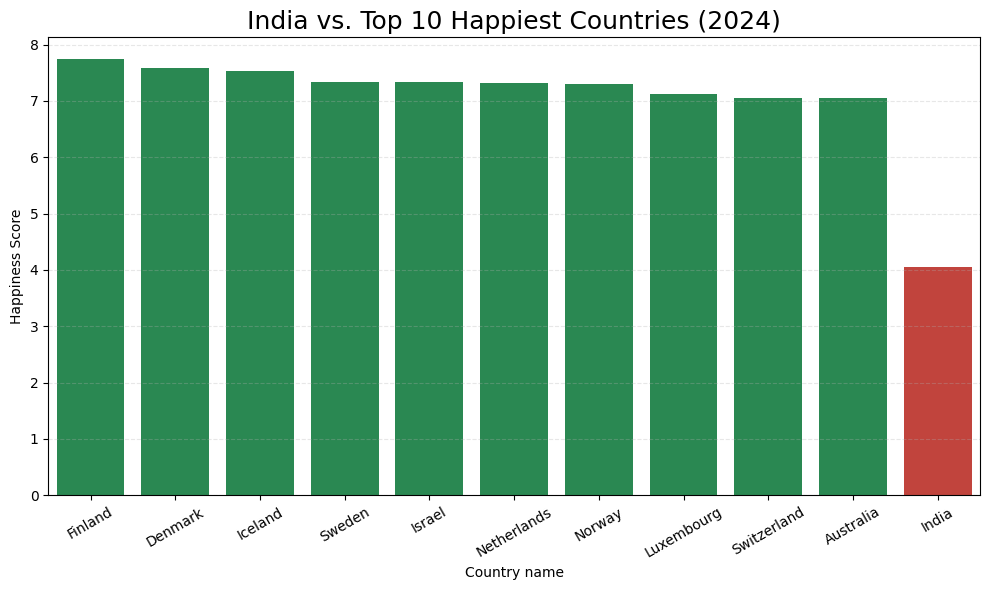

/tmp/ipython-input-1996703026.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country name', y='Ladder score', data=custom_bottom,


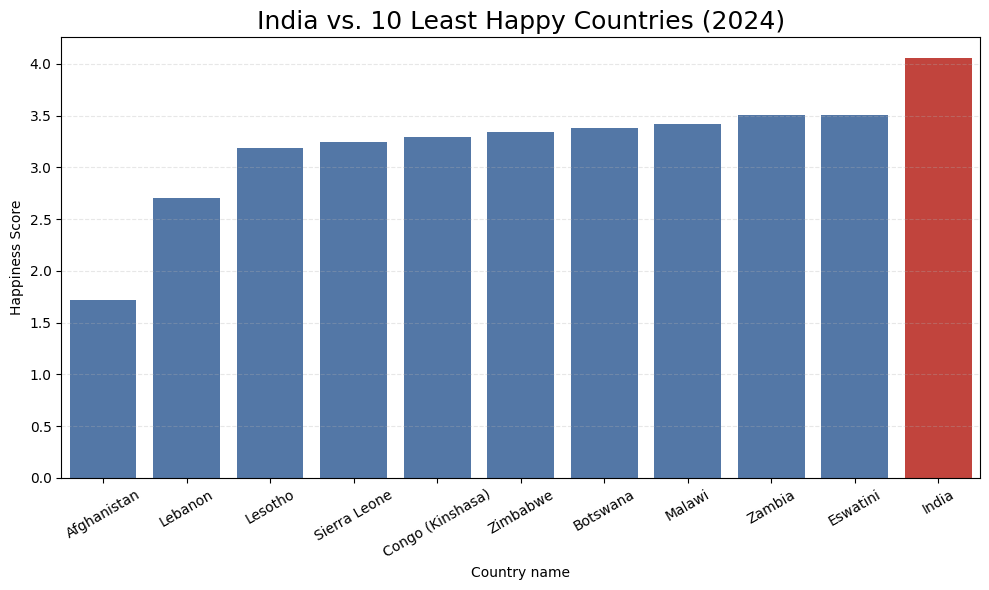

In [4]:
# Top 10 + India
top_10 = df.nlargest(10, 'Ladder score')
india = df[df['Country name'] == 'India']
custom_top = pd.concat([top_10, india]).drop_duplicates().sort_values('Ladder score', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Country name', y='Ladder score', data=custom_top,
            palette=['#d73027' if country == 'India' else '#1a9850' for country in custom_top['Country name']])
plt.title('India vs. Top 10 Happiest Countries (2024)', fontsize=18)
plt.ylabel('Happiness Score')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Bottom 10 + India
bottom_10 = df.nsmallest(10, 'Ladder score')
custom_bottom = pd.concat([bottom_10, india]).drop_duplicates().sort_values('Ladder score')

plt.figure(figsize=(10, 6))
sns.barplot(x='Country name', y='Ladder score', data=custom_bottom,
            palette=['#d73027' if country == 'India' else '#4575b4' for country in custom_bottom['Country name']])
plt.title('India vs. 10 Least Happy Countries (2024)', fontsize=18)
plt.ylabel('Happiness Score')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

#3: Factor Analysis
 ### What Affects Happiness?

Happiness isn’t just about money — it depends on a mix of different things. In this section, I’ve looked at some key factors that play a big role in how happy people are across countries:

- **GDP per capita**: How strong the economy is
- **Social support**: Whether people have someone to rely on
- **Healthy life expectancy**: How long and healthy people live
- **Freedom**: If people feel free to make life choices
- **Generosity**: How kind and giving people are
- **Perceptions of corruption**: How much people trust their government and system

Now let’s see how India compares to the global average in each of these areas. This helps us understand where India is doing well and where there’s room to improve.

<Figure size 1000x600 with 0 Axes>

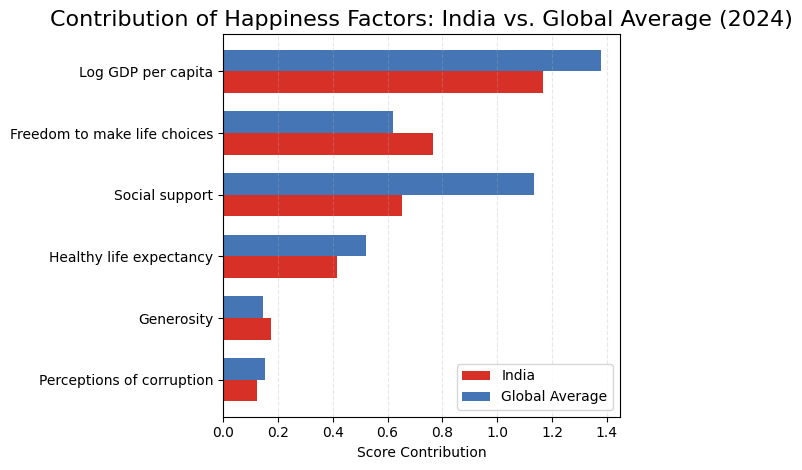

In [5]:
factors = ['Log GDP per capita', 'Social support', 'Healthy life expectancy',
           'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

india_values = df[df['Country name'] == 'India'][factors].iloc[0]
global_avg = df[factors].mean()

comparison_df = pd.DataFrame({'India': india_values, 'Global Average': global_avg}, index=factors)
comparison_df = comparison_df.sort_values(by='India', ascending=True)

plt.figure(figsize=(10, 6))
comparison_df.plot(kind='barh', width=0.7, color=['#d73027', '#4575b4'])
plt.title('Contribution of Happiness Factors: India vs. Global Average (2024)', fontsize=16)
plt.xlabel('Score Contribution')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

#4: India vs. South Asian Neighbors

In this part, I’ve compared India with other nearby countries like Nepal, Bangladesh, Bhutan, Sri Lanka, and a few more from South Asia. This gives a better idea of how India is doing in its own region — not just globally.

By looking at this chart, we can see whether India is ahead or behind its neighbors when it comes to happiness. I’ve highlighted India in red so it’s easy to spot.

/tmp/ipython-input-4126804210.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country name', y='Ladder score', data=neighbor_data,


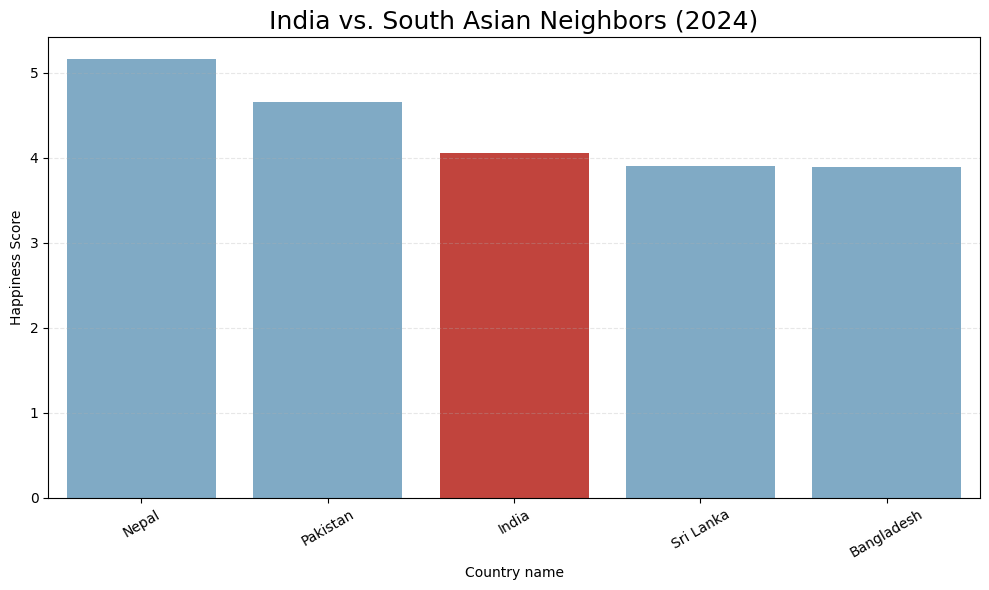

In [6]:
neighbors = ['India', 'Pakistan', 'Nepal', 'Bangladesh', 'Sri Lanka', 'Bhutan', 'Maldives']
neighbor_data = df[df['Country name'].isin(neighbors)].sort_values('Ladder score', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Country name', y='Ladder score', data=neighbor_data,
            palette=['#d73027' if country == 'India' else '#74add1' for country in neighbor_data['Country name']])
plt.title('India vs. South Asian Neighbors (2024)', fontsize=18)
plt.ylabel('Happiness Score')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

#5: Correlation of Happiness Factors with Ladder Score

In this section, I’ve used a heatmap to show how different factors are related to happiness across all countries. It helps us understand which things matter the most when it comes to people feeling happy.

For example:
- If a factor has a **high positive correlation**, it means countries with higher scores in that area tend to be happier.
- If the correlation is **low or negative**, that factor doesn’t have much impact or might even pull happiness down.

This gives a clear idea of what drives happiness globally — like GDP, social support, and health — and helps us see which areas are most important to focus on.

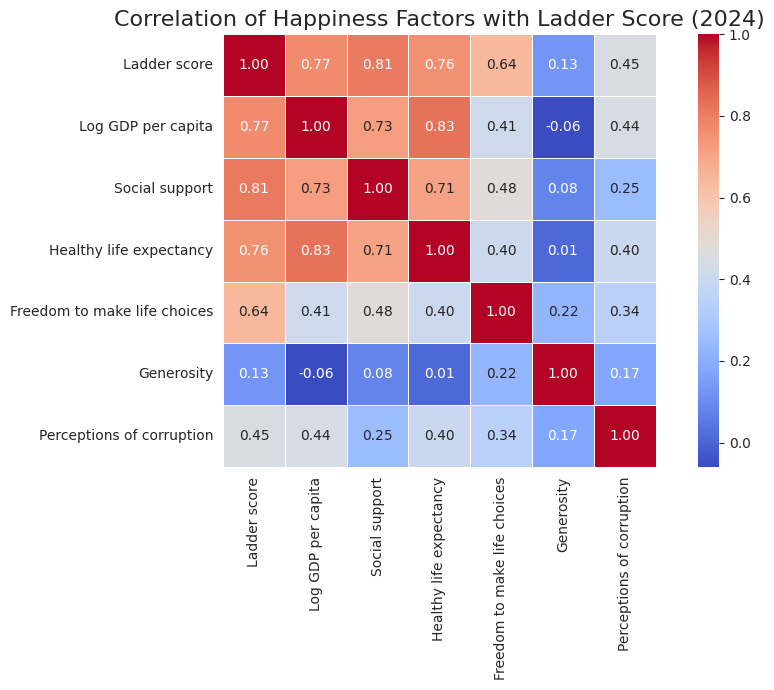

In [8]:
corr_columns = ['Ladder score'] + factors
corr_matrix = df[corr_columns].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
plt.title('Correlation of Happiness Factors with Ladder Score (2024)', fontsize=16)
plt.tight_layout()
plt.show()

#5.1: India’s Happiness Profile vs. Global Average

While the previous heatmap showed how happiness factors correlate globally, this radar chart focuses on **India’s individual profile**. It compares India’s scores across key happiness dimensions with the global average.

This helps us visually understand:
- Where India performs **above average** (e.g., generosity, freedom)
- Where India **lags behind** (e.g., social support, corruption perception)

It’s a snapshot of India’s strengths and gaps in the happiness landscape.


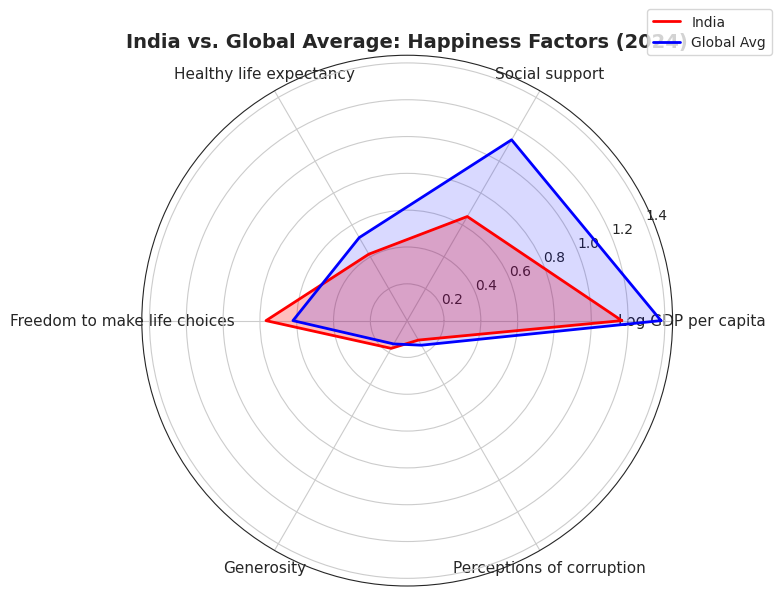

In [10]:
import numpy as np

# Prepare data
labels = factors
india_scores = india_values.values
global_scores = global_avg.values

# Radar setup
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
india_scores = np.concatenate((india_scores, [india_scores[0]]))
global_scores = np.concatenate((global_scores, [global_scores[0]]))
angles += [angles[0]]

# Plot
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))
ax.plot(angles, india_scores, color='red', linewidth=2, label='India')
ax.fill(angles, india_scores, color='red', alpha=0.25)
ax.plot(angles, global_scores, color='blue', linewidth=2, label='Global Avg')
ax.fill(angles, global_scores, color='blue', alpha=0.15)

# Labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=11)
ax.set_title('India vs. Global Average: Happiness Factors (2024)', fontsize=14, weight='bold')
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()

#6: India’s Position in Distribution

This chart shows how happiness scores are spread across all 143 countries in the dataset. It helps us see whether most countries are doing well or not so great in terms of happiness.

I’ve marked **India with a red dashed line** so it’s easy to spot where it stands in the overall distribution. This gives a clear idea of whether India is closer to the top, middle, or bottom compared to other countries.

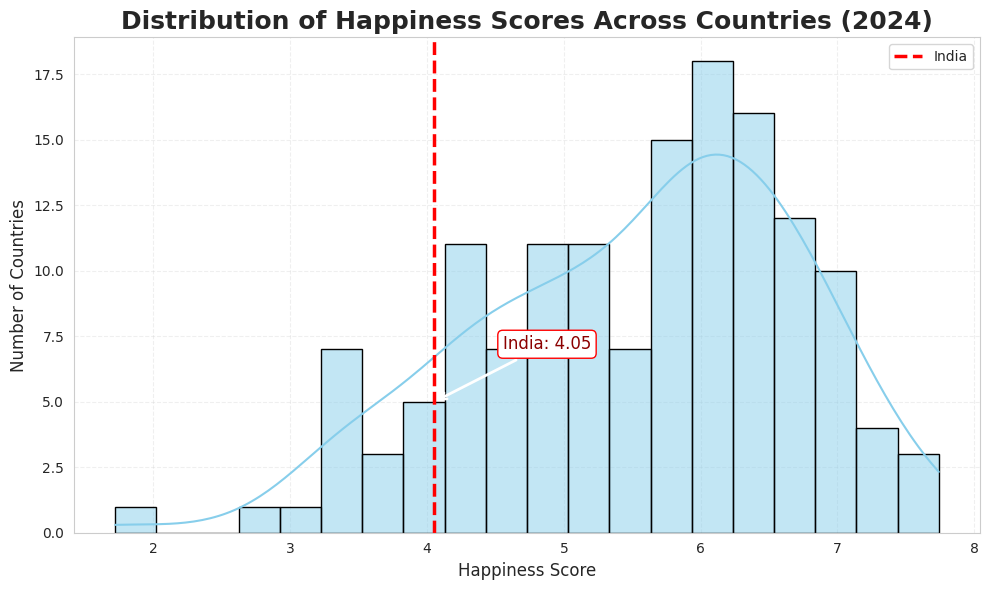

In [11]:
# Get India's happiness score
india_score = df[df['Country name'] == 'India']['Ladder score'].values[0]

# Set up the plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Plot histogram with KDE
sns.histplot(df['Ladder score'], bins=20, kde=True, color='skyblue', edgecolor='black')

# Highlight India
plt.axvline(india_score, color='red', linestyle='--', linewidth=2.5, label='India')

# Annotate India's score
plt.annotate(
    f"India: {india_score:.2f}",
    xy=(india_score, 5),
    xytext=(india_score + 0.5, 7),
    fontsize=12,
    color='darkred',
    backgroundcolor='white',
    arrowprops=dict(facecolor='red', arrowstyle='->', lw=2),
    bbox=dict(boxstyle='round,pad=0.3', edgecolor='red', facecolor='white')
)

# Final touches
plt.title('Distribution of Happiness Scores Across Countries (2024)', fontsize=18, weight='bold')
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Number of Countries', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

#7: Final Thought  
### Conclusion

After exploring the data, it’s clear that **India ranks somewhere in the middle** when it comes to global happiness. It does well in areas like **generosity** and **freedom to make life choices**, but struggles with **social support** and **corruption perception**.

Here’s what I learned from this analysis:
- Happiness depends on many things — not just money or GDP.
- India still has room to improve in areas like **trust** and **health**.
- Compared to its South Asian neighbors, India is ahead of some and behind others.

Overall, this project gave me a better understanding of how different factors shape happiness around the world — and where India fits into that picture.  
